/var/folders/6x/xzgk_zn14ld1kb206ts3k5p00000gn/T/ipykernel_15977/3989600607.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


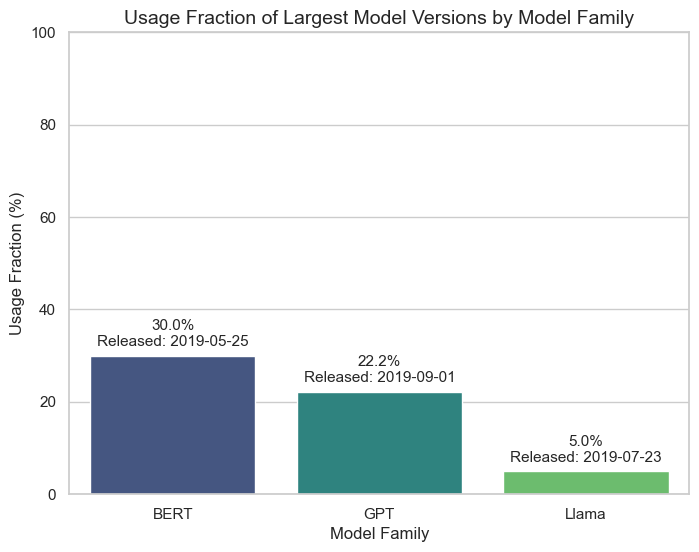

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data with Release Date
data = {
    "Model Family": [
        "Llama",
        "Llama",
        "Llama",
        "Llama",
        "GPT",
        "GPT",
        "GPT",
        "BERT",
        "BERT",
    ],
    "Model Version": [
        "Llama-7B",
        "Llama-13B",
        "Llama-70B",
        "Llama-405B",
        "GPT-2",
        "GPT-3",
        "GPT-4",
        "BERT-Base",
        "BERT-Large",
    ],
    "Param Count": [7e9, 1.3e10, 7e10, 4.05e11, 1.5e9, 1.75e11, 1e12, 1.1e8, 3.4e8],
    "Usage Count": [50, 30, 15, 5, 80, 60, 40, 70, 30],
    "Type": [
        "Models used in research",
        "Models used in research",
        "Models used in research",
        "Models used in research",
        "Models released",
        "Models released",
        "Models released",
        "Models used in research",
        "Models used in research",
    ],
    "Release Date": [
        "2019-02-04",
        "2019-03-21",
        "2019-05-15",
        "2019-07-23",
        "2019-01-31",
        "2019-06-01",
        "2019-09-01",
        "2019-02-14",
        "2019-05-25",
    ],
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Release Date' to datetime
df["Release Date"] = pd.to_datetime(df["Release Date"])

# Identify the largest model within each family
idx = df.groupby("Model Family")["Param Count"].idxmax()
largest_models = df.loc[idx].reset_index(drop=True)

# Calculate total usage per model family
total_usage = df.groupby("Model Family")["Usage Count"].sum().reset_index()
total_usage = total_usage.rename(columns={"Usage Count": "Total Usage"})

# Merge largest models with total usage
largest_models = largest_models.merge(total_usage, on="Model Family")

# Calculate usage fraction
largest_models["Usage Fraction"] = (
    largest_models["Usage Count"] / largest_models["Total Usage"]
) * 100

# **Convert Release Date to string for annotation**
largest_models["Release Date"] = largest_models["Release Date"].dt.strftime("%Y-%m-%d")

# Visualize the usage fraction
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=largest_models, x="Model Family", y="Usage Fraction", palette="viridis"
)

plt.title("Usage Fraction of Largest Model Versions by Model Family", fontsize=14)
plt.ylabel("Usage Fraction (%)", fontsize=12)
plt.xlabel("Model Family", fontsize=12)
plt.ylim(0, 100)

# Annotate the bars with the usage fraction values and release dates
for index, row in largest_models.iterrows():
    plt.text(
        index,
        row["Usage Fraction"] + 2,
        f"{row['Usage Fraction']:.1f}%\nReleased: {row['Release Date']}",
        ha="center",
        fontsize=11,
    )

plt.show()


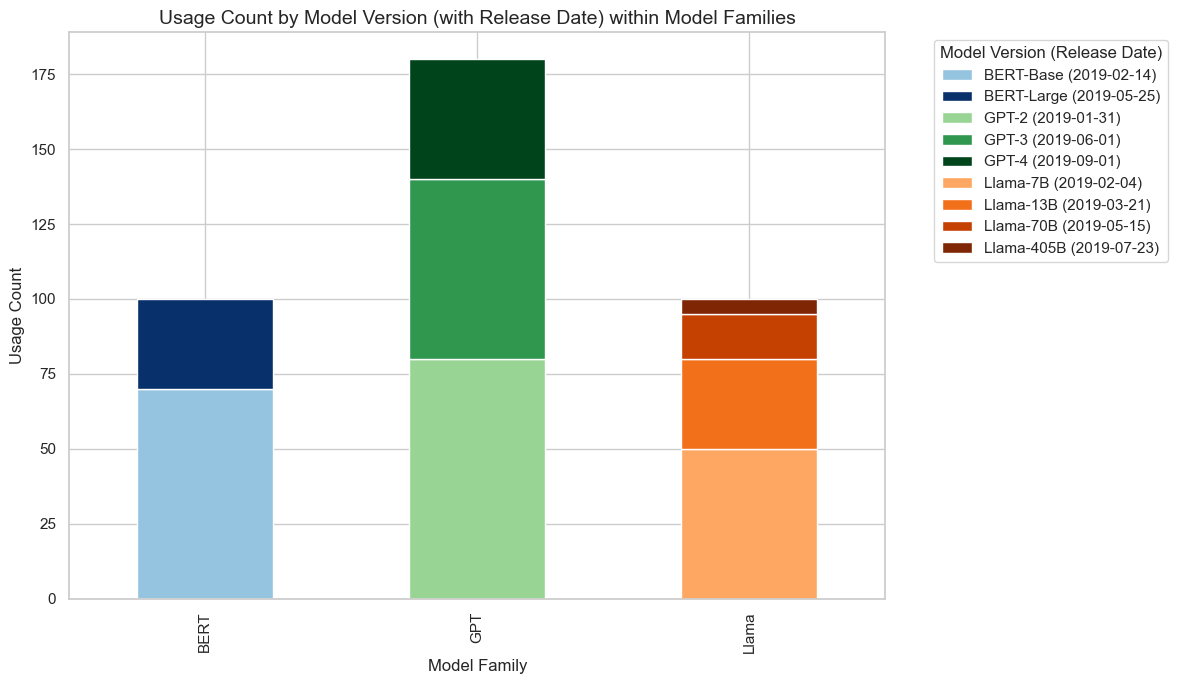

In [35]:
# Map each model version to its release date
model_version_to_release = (
    df.set_index("Model Version")["Release Date"].dt.strftime("%Y-%m-%d").to_dict()
)

# Update model version labels to include release date
df["Model Version (with Date)"] = (
    df["Model Version"] + " (" + df["Release Date"].dt.strftime("%Y-%m-%d") + ")"
)

# Pivot the data for the stacked bar chart using updated labels
pivot_df = df.pivot(
    index="Model Family", columns="Model Version (with Date)", values="Usage Count"
).fillna(0)

# Reorder columns to have smaller models at the bottom of the stack
model_order = {
    "BERT": ["BERT-Base", "BERT-Large"],
    "GPT": ["GPT-2", "GPT-3", "GPT-4"],
    "Llama": ["Llama-7B", "Llama-13B", "Llama-70B", "Llama-405B"],
}

# Update columns_order with new labels
columns_order = []
for family in pivot_df.index:
    versions = model_order[family]
    versions_with_dates = [
        version + " (" + model_version_to_release[version] + ")" for version in versions
    ]
    columns_order.extend(versions_with_dates)

# Remove duplicates and ensure columns exist in pivot_df
columns_order = [col for col in columns_order if col in pivot_df.columns]

# Reorder the columns of pivot_df
pivot_df = pivot_df[columns_order]

# Map each model version (with date) to its family
model_version_to_family = df.set_index("Model Version (with Date)")[
    "Model Family"
].to_dict()

# Define colormaps for each model family
family_colormaps = {"BERT": "Blues", "GPT": "Greens", "Llama": "Oranges"}

# Create a color mapping for each model version (with date)
color_mapping = {}
for family in pivot_df.index:
    versions = [
        version
        for version in columns_order
        if model_version_to_family[version] == family
    ]
    cmap = plt.get_cmap(family_colormaps[family])
    colors = cmap(np.linspace(0.4, 1, len(versions)))
    for version, color in zip(versions, colors):
        color_mapping[version] = color

# Get the colors in the order of columns in pivot_df
colors = [color_mapping[col] for col in pivot_df.columns]

# Plot the stacked bar chart with the new color scheme
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 7), color=colors)

# Add title and labels
plt.title(
    "Usage Count by Model Version (with Release Date) within Model Families",
    fontsize=14,
)
plt.ylabel("Usage Count", fontsize=12)
plt.xlabel("Model Family", fontsize=12)

# Move the legend outside the plot
plt.legend(
    title="Model Version (Release Date)", bbox_to_anchor=(1.05, 1), loc="upper left"
)

# Adjust layout
plt.tight_layout()
plt.show()


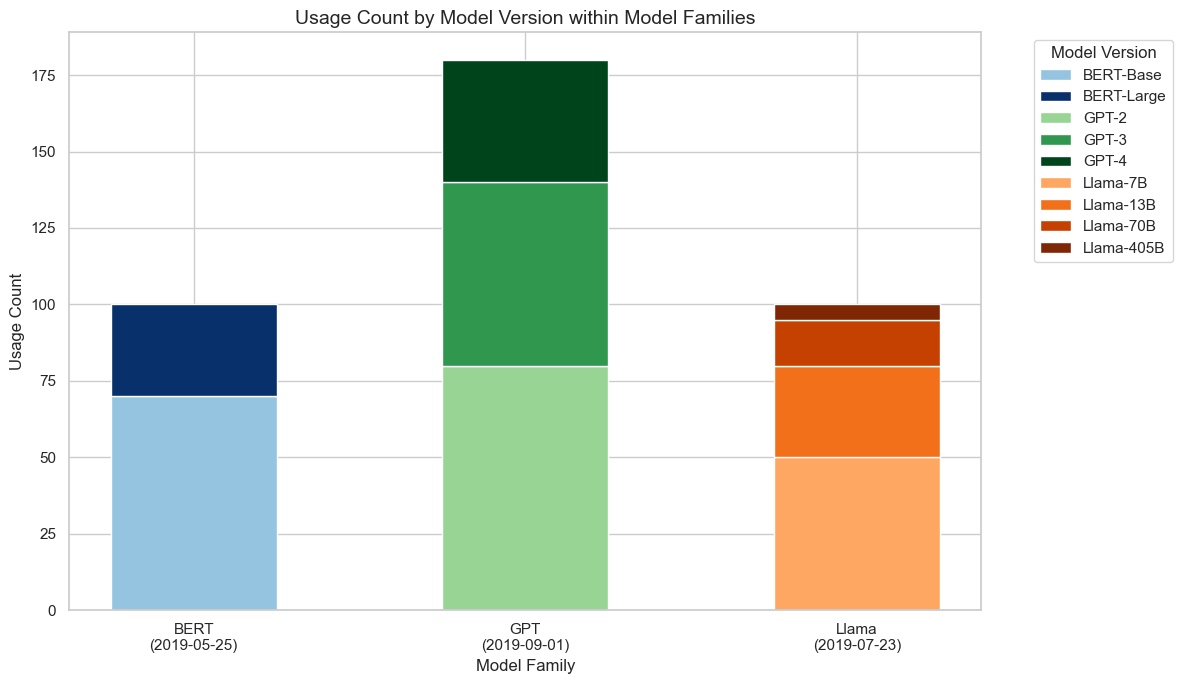

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data with Release Date
data = {
    "Model Family": [
        "Llama",
        "Llama",
        "Llama",
        "Llama",
        "GPT",
        "GPT",
        "GPT",
        "BERT",
        "BERT",
    ],
    "Model Version": [
        "Llama-7B",
        "Llama-13B",
        "Llama-70B",
        "Llama-405B",
        "GPT-2",
        "GPT-3",
        "GPT-4",
        "BERT-Base",
        "BERT-Large",
    ],
    "Param Count": [7e9, 1.3e10, 7e10, 4.05e11, 1.5e9, 1.75e11, 1e12, 1.1e8, 3.4e8],
    "Usage Count": [50, 30, 15, 5, 80, 60, 40, 70, 30],
    "Type": [
        "Models used in research",
        "Models used in research",
        "Models used in research",
        "Models used in research",
        "Models released",
        "Models released",
        "Models released",
        "Models used in research",
        "Models used in research",
    ],
    "Release Date": [
        "2019-02-04",
        "2019-03-21",
        "2019-05-15",
        "2019-07-23",
        "2019-01-31",
        "2019-06-01",
        "2019-09-01",
        "2019-02-14",
        "2019-05-25",
    ],
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Release Date' to datetime
df["Release Date"] = pd.to_datetime(df["Release Date"])

# Prepare data for the stacked bar chart
# Sort the data to ensure correct stacking order (from smallest to largest models)
model_order = {
    "BERT": ["BERT-Base", "BERT-Large"],
    "GPT": ["GPT-2", "GPT-3", "GPT-4"],
    "Llama": ["Llama-7B", "Llama-13B", "Llama-70B", "Llama-405B"],
}

# Identify the largest model within each family
idx = df.groupby("Model Family")["Param Count"].idxmax()
largest_models = df.loc[idx].reset_index(drop=True)

# Create a mapping from model family to release date of the largest model
family_to_release_date = dict(
    zip(
        largest_models["Model Family"],
        largest_models["Release Date"].dt.strftime("%Y-%m-%d"),
    )
)

# Initialize a figure
fig, ax = plt.subplots(figsize=(12, 7))

# Define colormaps for each model family
family_colormaps = {"BERT": "Blues", "GPT": "Greens", "Llama": "Oranges"}

# Set bar width and positions
bar_width = 0.5
x_positions = np.arange(len(model_order.keys()))

# Map model family to x position
family_to_xpos = {family: xpos for family, xpos in zip(model_order.keys(), x_positions)}

# Loop over each model family to plot bars
for family in model_order.keys():
    family_data = df[df["Model Family"] == family]
    versions = model_order[family]
    versions = [v for v in versions if v in family_data["Model Version"].values]

    # Sort models in order
    family_data = family_data.set_index("Model Version").loc[versions].reset_index()

    # Generate colors for the family
    cmap = plt.get_cmap(family_colormaps[family])
    colors = cmap(np.linspace(0.4, 1, len(versions)))

    bottom = 0  # Initialize bottom position for stacking
    xpos = family_to_xpos[family]

    for idx, (index, row) in enumerate(family_data.iterrows()):
        usage = row["Usage Count"]
        version = row["Model Version"]
        color = colors[idx]

        # Plot the bar segment
        ax.bar(xpos, usage, bar_width, bottom=bottom, color=color, edgecolor="white")

        # Update bottom position
        bottom += usage

# **Update x-axis labels to include release dates**
x_labels = []
for family in model_order.keys():
    release_date = family_to_release_date.get(family, "")
    label = f"{family}\n({release_date})"
    x_labels.append(label)

# Set x-axis labels and ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)
ax.set_xlabel("Model Family", fontsize=12)
ax.set_ylabel("Usage Count", fontsize=12)
ax.set_title("Usage Count by Model Version within Model Families", fontsize=14)

# Create custom legend
from matplotlib.patches import Patch

legend_elements = []

for family in model_order.keys():
    versions = model_order[family]
    versions = [v for v in versions if v in df["Model Version"].values]
    cmap = plt.get_cmap(family_colormaps[family])
    colors = cmap(np.linspace(0.4, 1, len(versions)))
    for version, color in zip(versions, colors):
        legend_elements.append(
            Patch(facecolor=color, edgecolor="white", label=f"{version}")
        )

# Add the legend outside the plot
ax.legend(
    handles=legend_elements,
    title="Model Version",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
